# Seaborn

Librería de visualización interactiva.
Prove una interfaz de alto nivel para realizar gráficos de forma muy vistosa.

## Instalación en Jupyter

* Con anaconda:
```bash
conda install seaborn
```
* Sin anaconda
```bash
pip install seaborn
```

## Algunos ejemplos

In [1]:
import seaborn as sns

# cargamos un dataset que viene por defecto para hacer pruebas
propinas = sns.load_dataset('tips')

propinas.head(10) # mostramos los primeros 10 elementos


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


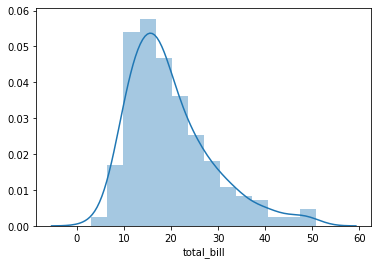

In [2]:
# realizamos un histograma (el cual solo mmirará una variable)
sns.distplot(propinas['total_bill'])

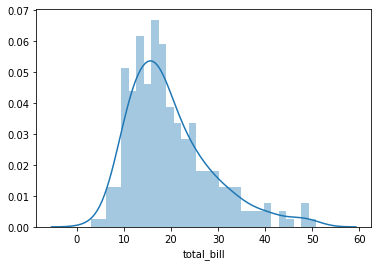

In [3]:
# incorporamos 30 barra para dibujar la gráfica
sns.distplot(propinas['total_bill'], bins=30)

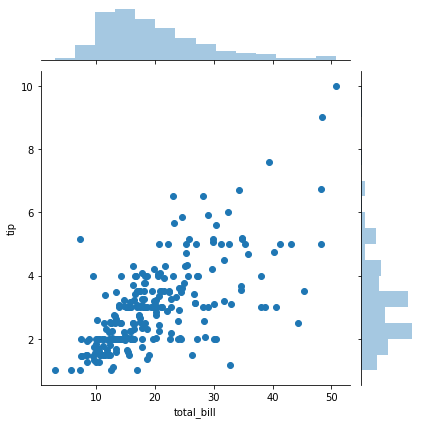

In [4]:
# histograma que mira la relación entre 2 variables de la tabla
'''
Observaremos 2 histogramas por cada una de las variables que hemos reflejado en x e y
Compara el total_bill(factura) con el tip(propina), apreciando que la mayoría se encuentran en la zona inferior izquierda
Por tanto, cuando la factura se encuentra entre 10 y 20, la propina será entre 2 y 4.
'''
sns.jointplot(x='total_bill', y='tip', data=propinas)

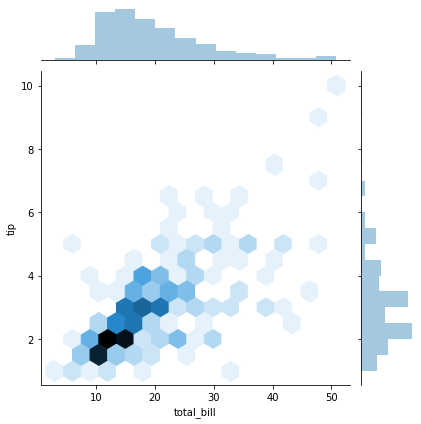

In [5]:
# lo mismo pero en hexadecimal (mostrandolo poro colores)
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='hex')

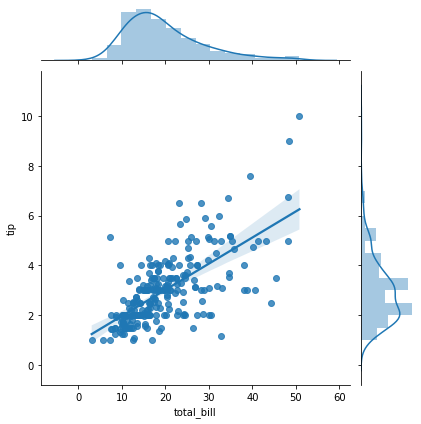

In [6]:
# lo mismo pero en forma de regresión lineal
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='reg')

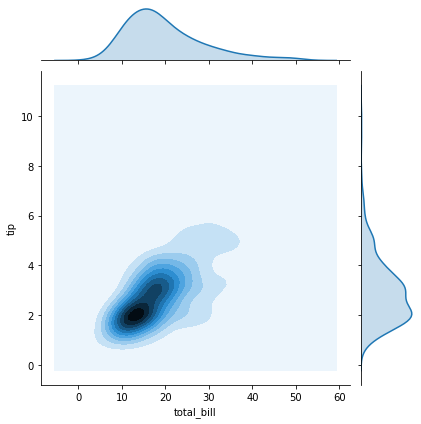

In [7]:
# lo mismo a través de un gráfico de densidad: cuanto mayor o mas intenso es el color, mayor número de puntos (concentración de los puntos)
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='kde')

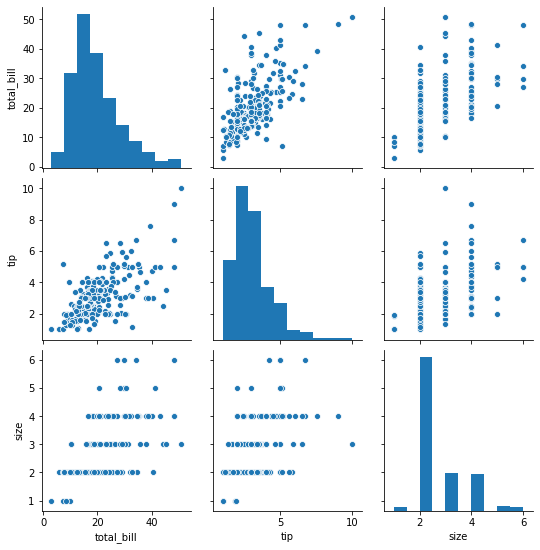

In [8]:
# si queremos comprar todas las variables numéricas 2 a 2.
# las unicas columnas que son numéricas con 'total_bill', 'tip' y 'size'
# cuando se compara consigo mismo (ex: tip con tip) saca un histograma

sns.pairplot(propinas)

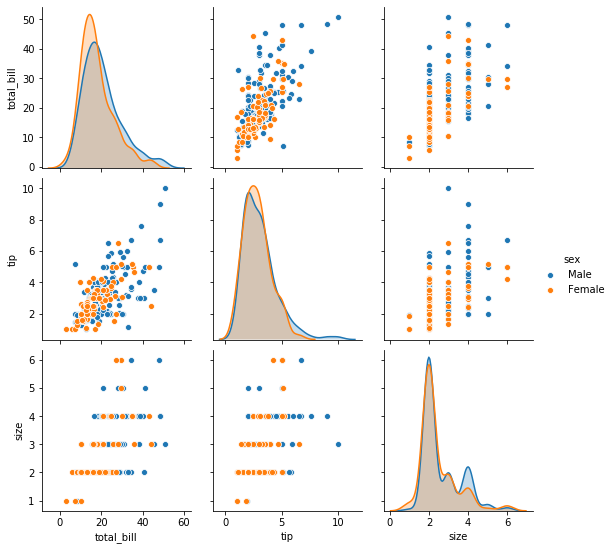

In [9]:
# si queremos comprar todas las variables NO numéricas
# por ej: con respecto al 'total bill', la bill es mayor es la femenina
sns.pairplot(propinas, hue='sex')

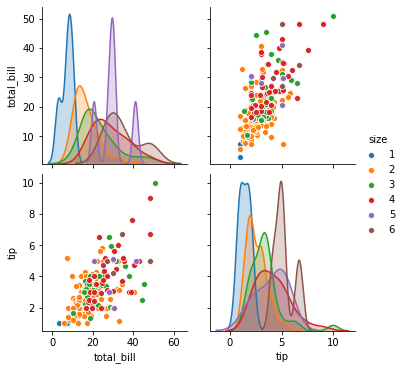

In [10]:
# si queremos comprar todas las variables numéricas por ej, el número de personas
sns.pairplot(propinas, hue='size')

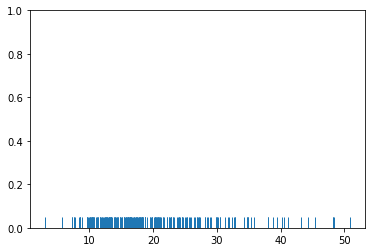

In [11]:
# Si queremos conocer en qué parte se concentran más las variables. 
# Por ejemplo, la mayor parte de las facturas están entre 10 y 20.
sns.rugplot(propinas['total_bill'])

## Gráficos para categorías 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# cargamos un dataset que viene por defecto para hacer pruebas
propinas = sns.load_dataset('tips')

propinas.head(10) # mostramos los primeros 10 elementos

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


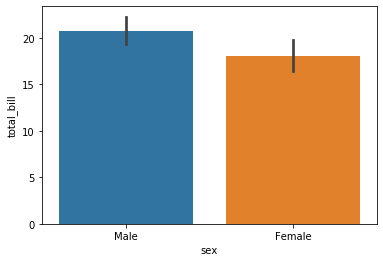

In [13]:
# comparamos el promedio de cada sexo con respecto al total de la factura
sns.barplot(x='sex', y ='total_bill', data=propinas)

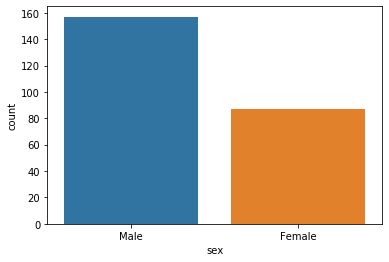

In [14]:
# considera la suma del número de personas masculinas y femeninas según su dataset
sns.countplot(x='sex', data=propinas)

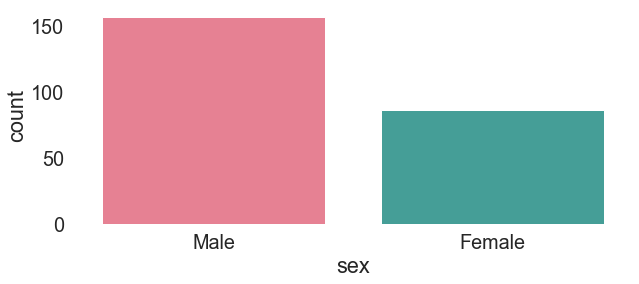

In [45]:
# a lo mismo, le vamos a añadir algunos parametros de estilo:
plt.figure(figsize=(10,4)) # tamaño de 10x4
sns.set_style('white') # le damos un estilo
sns.set_context('notebook', font_scale=1.8) # aumentar la letra
sns.countplot(x='sex', data=propinas, palette='husl') # paleta de colores
sns.despine() # con esto quitamos las barras laterales
sns.despine(left=True, bottom=True) # con esto quitamos las izquierda y abajo

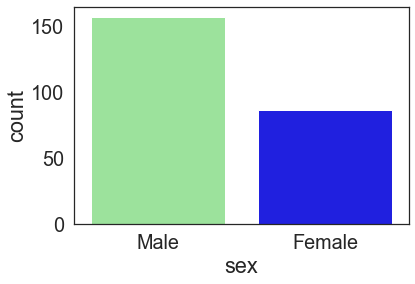

In [46]:
# si queremos personalizar los colores
colores = ['lightgreen','blue']
sns.countplot(x='sex', data=propinas, palette=colores)

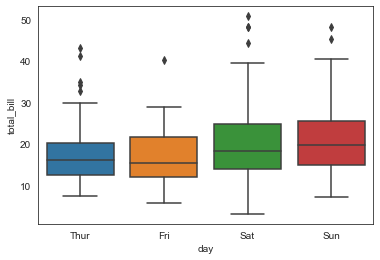

In [16]:
# Diagrama de cajas del importe total de las facturas con respecto a los dias
# Representa 50% de las muestras
sns.boxplot(x='day', y='total_bill',data=propinas)

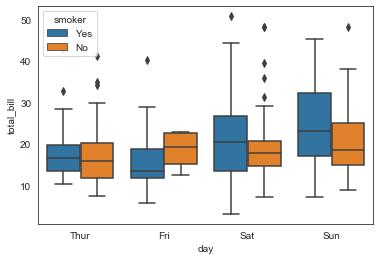

In [17]:
# Diagrama de cajas del importe total de las facturas con respecto a los dias y si son o no fumadores
# Representa 50% de las muestras
sns.boxplot(x='day', y='total_bill',data=propinas,hue='smoker')

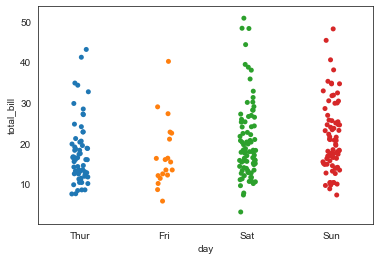

In [18]:
# Otra forma con distribución de puntos
sns.stripplot(x='day', y='total_bill',data=propinas) 

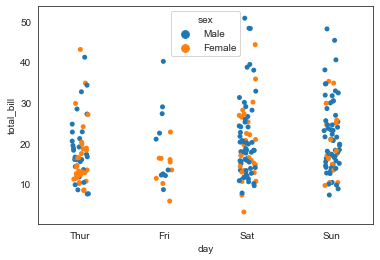

In [19]:
# Distribución de puntos con 2 variables pero se solapan
sns.stripplot(x='day', y='total_bill',data=propinas, hue='sex')

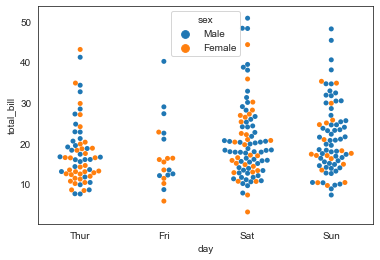

In [20]:
# Distribución de puntos con 2 variables pero que NO se solapan
sns.swarmplot(x='day', y='total_bill',data=propinas, hue='sex')

## Mapas de calor o Heatmaps

In [21]:
import seaborn as sns
vuelos = sns.load_dataset('flights')

vuelos.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [22]:
# primero tenemos que tener la tabla en formato matrix
vuelos_matrix = vuelos.pivot_table(index='month', columns='year', values='passengers')
vuelos_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


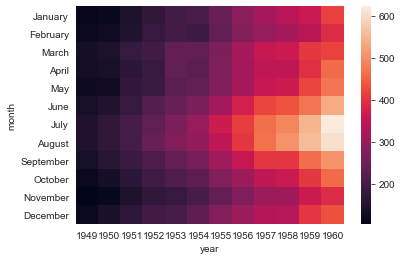

In [23]:
# creamos el mapa de calor
sns.heatmap(vuelos_matrix)

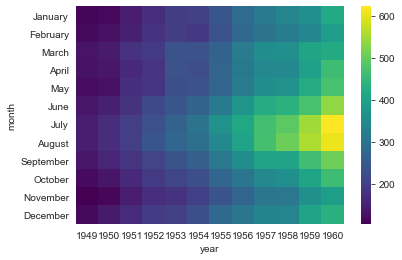

In [24]:
# cambiamos los colores añadiendo un nuevo atributo(consultar en: colormaps_reference.py)
sns.heatmap(vuelos_matrix, cmap='viridis') # tonos mas verdes

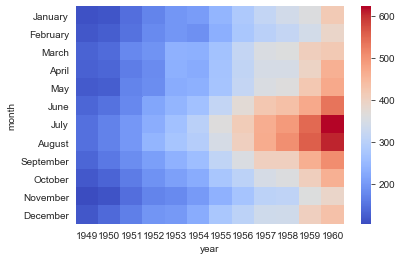

In [25]:
# cambiamos los colores añadiendo un nuevo atributo(consultar en: colormaps_reference.py)
sns.heatmap(vuelos_matrix, cmap='coolwarm') # tonos mas azules y rojos

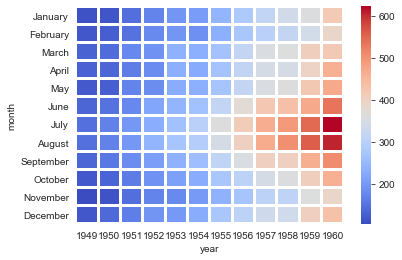

In [26]:
# añadimos una linea de separación
sns.heatmap(vuelos_matrix, cmap='coolwarm', linecolor='white', linewidths=2) # separa los cuadros con lineas blancas

## Gráficos de cuadrícula o grids 

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

flores = sns.load_dataset('iris')

flores.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


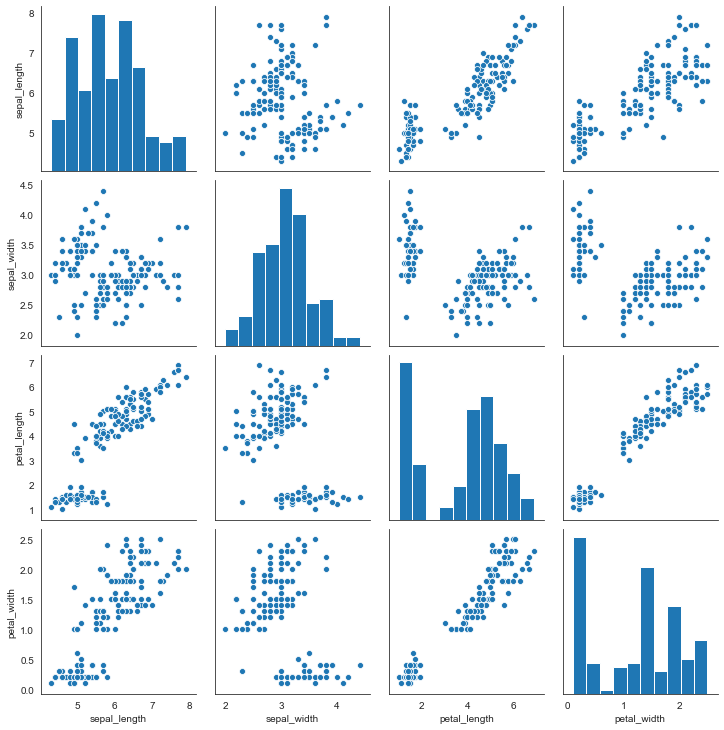

In [28]:
# vamos a realizar un gráfico 2 a 2 para ir comparando las variables que tiene nuestro dataset
sns.pairplot(flores)

## PairGrid 

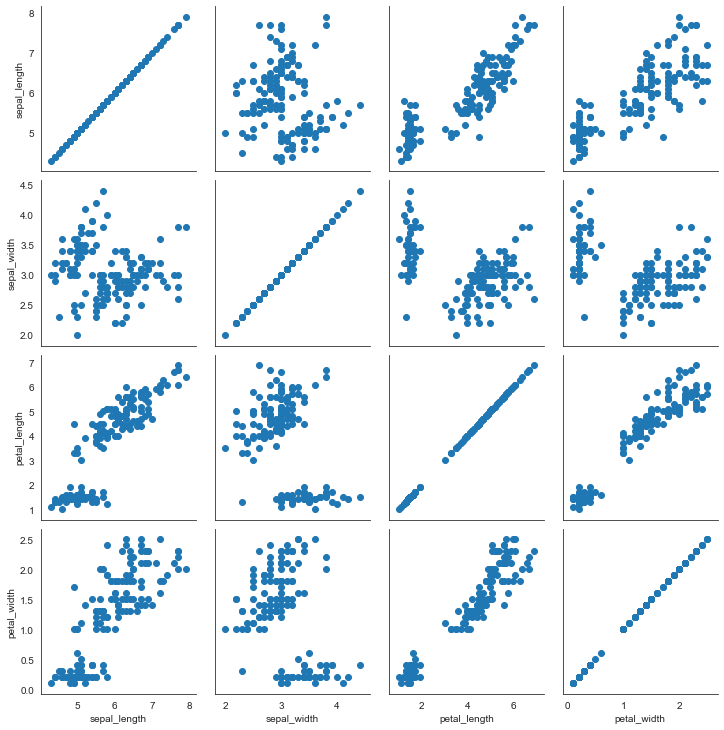

In [29]:
graficos = sns.PairGrid(flores) # creamos un grafico vacio
graficos.map(plt.scatter) # se rellena con los tipos de gráfico scatter en todas las celdas

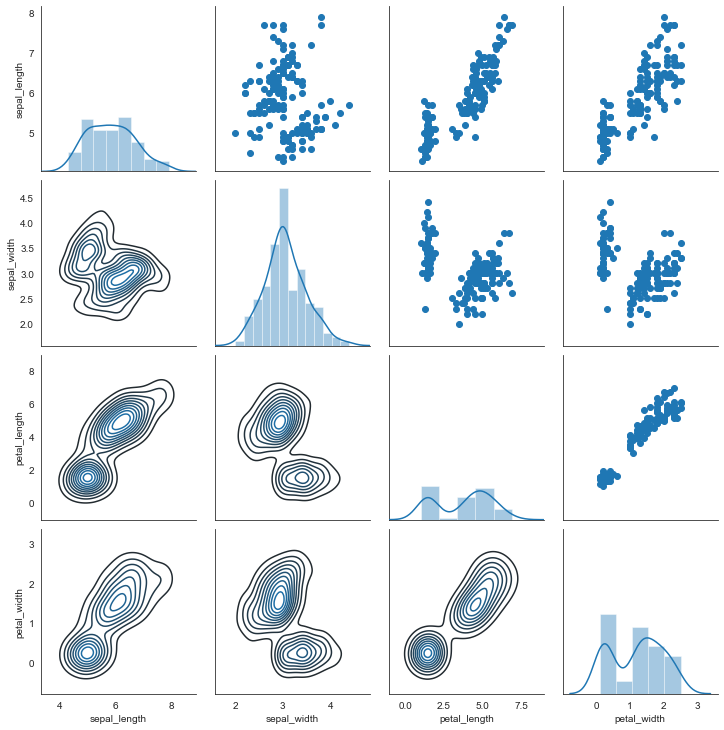

In [30]:
graficos = sns.PairGrid(flores) # creamos un grafico vacio
graficos.map_diag(sns.distplot) # rellena los graficos de la diagonal con los tipos de gráfico displot
graficos.map_upper(plt.scatter) # rellenamos la parte superior con gráficos tipo scatter
graficos.map_lower(sns.kdeplot) # rellenamos la parte inferior con gráficos tipo kdeplot

## FacetGrid 

In [31]:
propinas = sns.load_dataset('tips')
propinas.head() # 5 primeras

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
# vamos a ver cuantos valores diferentes hay dentro de la columna time
propinas['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

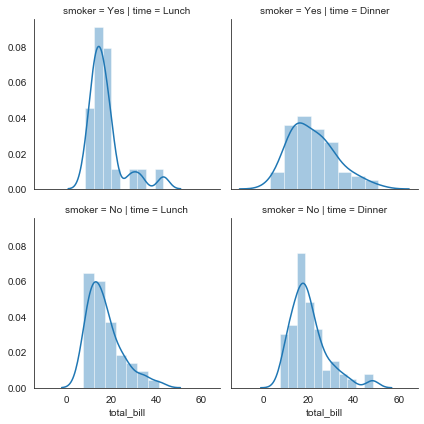

In [33]:
graficos2 = sns.FacetGrid(data=propinas, row='smoker', col='time')
graficos2.map(sns.distplot, 'total_bill')

## Gráficos de regresión

In [34]:
import seaborn as sns

propinas = sns.load_dataset('tips')
propinas.head() # 5 primeras

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


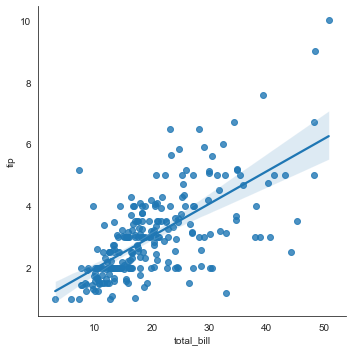

In [35]:
# representación de los puntos en relación a la 'factura total' y la 'propina'
# Se representa con la linea el ajuste lineal del gráfico de regresión
sns.lmplot(x='total_bill', y='tip', data= propinas)

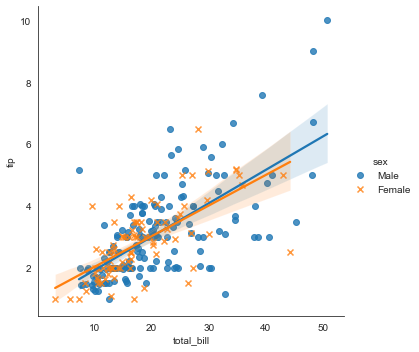

In [36]:
# podemos añadir una variable nueva para que se diferencie en el grafico, por ejemplo, el sexo, según sea le dato de un hombre o de una mujer
sns.lmplot(x='total_bill', y='tip', data= propinas, hue='sex', markers=['o','x']) # los markers permiten otra representación de olos puntos

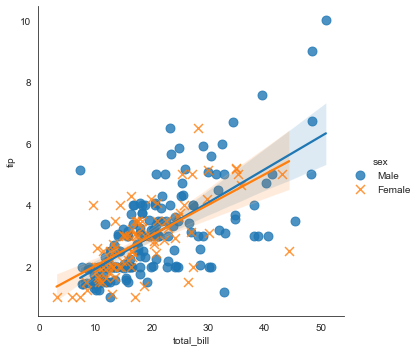

In [37]:
# Podemos añadir otras propiedades para modificar el gráfico como sería el tamaño de los puntos
sns.lmplot(x='total_bill', y='tip', data= propinas, hue='sex', markers=['o','x'],scatter_kws={'s':80})

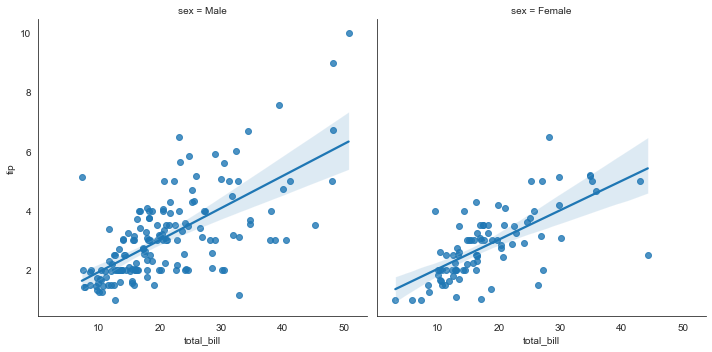

In [38]:
# si queremos que los datos de 'sex' que ahora están juntos, nos lo ponga por columnas, sería:
sns.lmplot(x='total_bill', y='tip', data= propinas, col='sex')

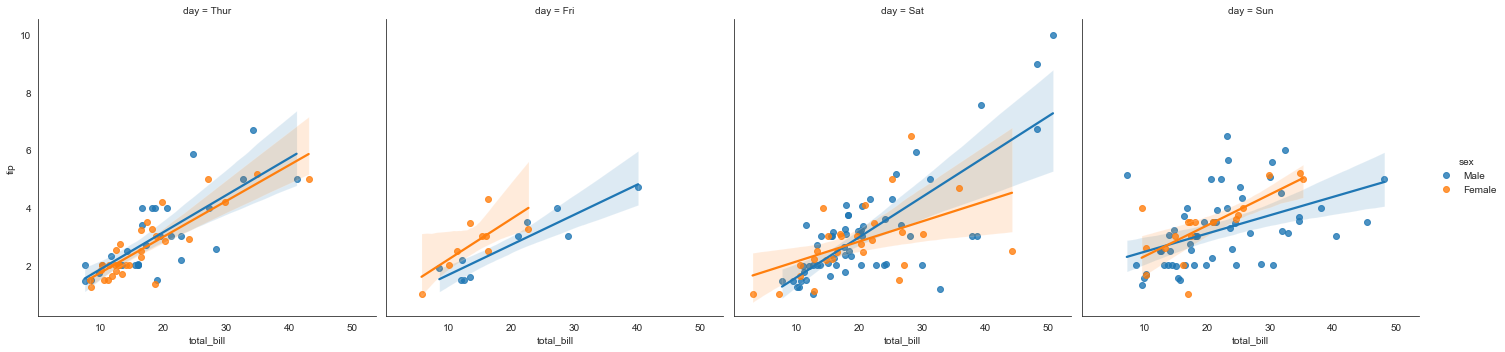

In [39]:
# si queremos los datos de 'sex' y que nos lo separe en columnas de 'dias', sería:
sns.lmplot(x='total_bill', y='tip', data= propinas, col='day', hue='sex')

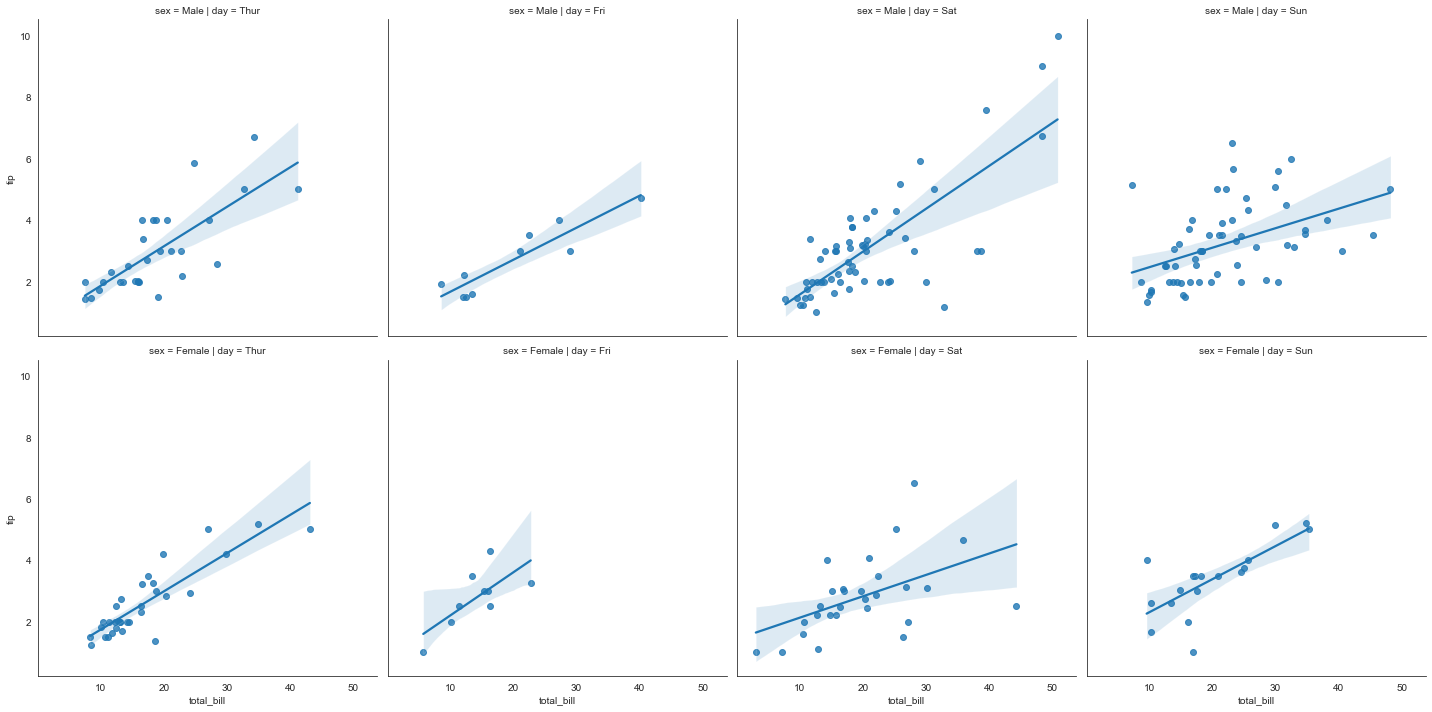

In [40]:
# si queremos separar los datos por filas y columnas que ahora están juntos, sería:
sns.lmplot(x='total_bill', y='tip', data= propinas, col='day', row='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


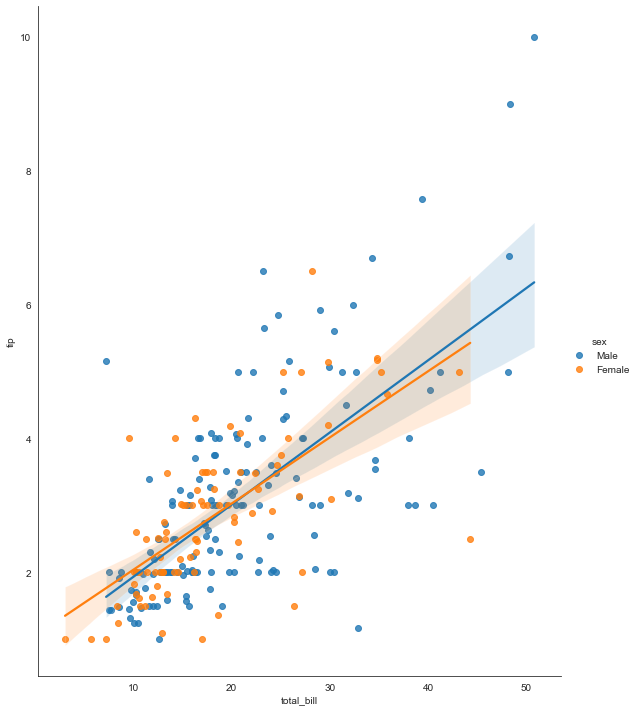

In [41]:
# si queremos ampliar la resolución del gráfico (aspect: anchura, size: tamaño)
sns.lmplot(x='total_bill', y='tip', hue='sex', data= propinas, aspect=0.8, size=10)